In [21]:
import numpy as np

In [157]:
import pandas as pd

In [242]:
hum_sim_surv = pd.read_csv('avg_hum_ratings.csv',header=None)
hum_avg_ratings = hum_sim_surv.loc[0].to_numpy()

In [243]:
len(hum_avg_ratings)

153

In [244]:
hum_sim_mat = np.zeros((18,18))
ind = 0
hum_sim_mat[:] = np.nan
for i in range(18):
    for j in range(i,18):
        if i!=j:
            hum_sim_mat[i,j] = hum_avg_ratings[ind]
            hum_sim_mat[j,i] = hum_avg_ratings[ind]
            ind+=1
        else:
            hum_sim_mat[i,j] = 6
        


In [245]:
hum_sim_mat.shape

(18, 18)

In [246]:
hum_sim_mat

array([[6.        , 3.70909091, 3.50909091, 1.01818182, 1.32727273,
        2.36363636, 1.36363636, 1.10909091, 1.92727273, 1.49090909,
        1.47272727, 1.41818182, 1.74545455, 1.58181818, 1.56363636,
        3.96363636, 3.83636364, 3.89090909],
       [3.70909091, 6.        , 5.25454545, 1.83636364, 2.16363636,
        2.09090909, 1.69090909, 1.8       , 1.72727273, 2.25454546,
        2.63636364, 1.94545455, 1.49090909, 1.52727273, 1.69090909,
        3.72727273, 3.56363636, 3.43636364],
       [3.50909091, 5.25454545, 6.        , 1.36363636, 1.50909091,
        1.70909091, 1.83636364, 1.4       , 1.76363636, 2.18181818,
        2.10909091, 2.03636364, 1.58181818, 1.2       , 1.36363636,
        3.03636364, 3.65454546, 3.72727273],
       [1.01818182, 1.83636364, 1.36363636, 6.        , 4.94545454,
        4.30909091, 2.41818182, 2.30909091, 2.14545455, 2.69090909,
        2.47272727, 2.14545455, 2.30909091, 2.16363636, 2.16363636,
        1.52727273, 1.89090909, 1.47272727],
    

In [275]:
F =np.genfromtxt('sim.csv',delimiter=',')

In [278]:
F

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.01353979, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.17586756],
       ...,
       [0.        , 0.        , 0.        , ..., 0.64869165, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.46846509, 0.        ,
        0.        ],
       [0.        , 0.        , 0.86696553, ..., 0.        , 0.        ,
        0.        ]])

In [279]:
F

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.01353979, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.17586756],
       ...,
       [0.        , 0.        , 0.        , ..., 0.64869165, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.46846509, 0.        ,
        0.        ],
       [0.        , 0.        , 0.86696553, ..., 0.        , 0.        ,
        0.        ]])

In [249]:
F.shape

(18, 4096)

In [250]:
model_sim = np.dot(F,np.transpose(F))

In [251]:
model_sim.shape

(18, 18)

In [252]:
model_sim_corr =  np.reshape(model_sim, (18*18))

In [280]:
np.corrcoef(np.reshape(hum_sim_mat,(18*18)),model_sim_corr)[0,1]

0.5917747354309193

In [209]:
hum_sim_mat[0], model_sim[0]

(array([1.        , 3.70909091, 3.50909091, 1.01818182, 1.32727273,
        2.36363636, 1.36363636, 1.10909091, 1.92727273, 1.49090909,
        1.47272727, 1.41818182, 1.74545455, 1.58181818, 1.56363636,
        3.96363636, 3.83636364, 3.89090909]),
 array([4861.96976424, 2944.52645212, 1410.49741066,  986.82615998,
        2385.0829761 , 2969.58399204, 1660.4621978 , 1630.35141612,
        2177.37614855, 1653.26587861, 1616.75044288, 1946.36854518,
        1692.15009491, 2336.00164855, 1375.7684425 , 2790.87569361,
        2529.63488607, 2550.26047111]))

In [122]:
humMat = humMat[0:18,0:18]

In [266]:
hum_sim_i_j = []
for i in range(hum_sim_mat.shape[0]):
    for j in range(i,hum_sim_mat.shape[1]):
        hum_sim_i_j.append(hum_sim_mat[i,j])

In [255]:
model_F= []
for i in range(F.shape[0]):
    for j in range(i,F.shape[0]):
        model_F.append(F[i] * F[j])

In [256]:
model_F_cv= []
for i in range(F.shape[0]):
    for j in range(F.shape[0]):
        model_F_cv.append(F[i] * F[j])

In [257]:
np.array(hum_sim_i_j).shape

(171,)

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [268]:
reg = Ridge(solver='sag', fit_intercept=False)
parameters = {'alpha': [10,100,1000,1e4, 50000, 1e5,1e6]}
search = GridSearchCV(reg, parameters, scoring='neg_mean_squared_error', cv=6)
search.fit(model_F, hum_sim_i_j)

GridSearchCV(cv=6, estimator=Ridge(fit_intercept=False, solver='sag'),
             param_grid={'alpha': [10, 100, 1000, 10000.0, 50000, 100000.0,
                                   1000000.0]},
             scoring='neg_mean_squared_error')

In [269]:
best_reg = search.best_estimator_
print(best_reg)

Ridge(alpha=10000.0, fit_intercept=False, solver='sag')


In [272]:
from sklearn.model_selection import cross_validate
a=cross_validate(best_reg,model_F_cv,np.reshape(hum_sim_mat,(18*18)),scoring="r2",cv=6)

In [262]:
hum_sim_mat.shape

(18, 18)

In [273]:
a['test_score'].mean()

0.28031946635964305

In [274]:
PredSimMat = best_reg.predict(model_F_cv)

cor_mat = np.corrcoef(PredSimMat, hum_sim_mat.reshape(18*18))
r = cor_mat[0,1]

r2 = r**2
print(r2)

0.6995293021075115


In [281]:
np.sqrt(r2)

0.8363786834368219

In [226]:
model_sim_corr

array([4861.96976424, 2944.52645212, 1410.49741066,  986.82615998,
       2385.0829761 , 2969.58399204, 1660.4621978 , 1630.35141612,
       2177.37614855, 1653.26587861, 1616.75044288, 1946.36854518,
       1692.15009491, 2336.00164855, 1375.7684425 , 2790.87569361,
       2529.63488607, 2550.26047111, 2944.52645212, 5046.35785885,
       1790.63746236,  858.64918005, 2533.52148831, 3042.37445792,
       1831.88455005, 1848.39825324, 1738.85302397, 1709.96963258,
       1680.81101689, 1971.15604931, 1677.05382059, 1975.85338471,
       1254.84554608, 2593.85560528, 2476.49066969, 2807.91929512,
       1410.49741066, 1790.63746236, 4176.72055058, 1302.18349091,
       1923.7579437 , 1501.18289729, 2168.54025268, 1311.8822066 ,
       1365.07336001, 1827.36943734, 1057.85085983, 1426.98100345,
       1553.08634192, 1132.87587488,  636.47101642, 1259.26322294,
       2119.50411983, 1626.95259428,  986.82615998,  858.64918005,
       1302.18349091, 3025.95628498, 1849.87362859, 1236.95976

In [283]:
extract_from_layer = ['fc6','fc7','fc8']

In [287]:
from model_hum_corr import *


In [292]:
corr_d = []
corr_ad = []
for layer in extract_from_layer:
    d,ad = calc_corr(f'sim_{layer}.csv','avg_hum_ratings.csv')
    corr_d.append(d)
    corr_ad.append(ad)

<BarContainer object of 3 artists>

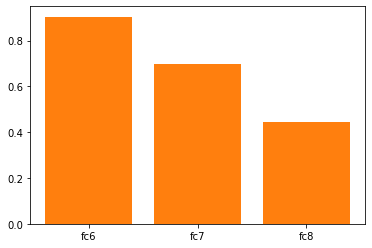

In [293]:
import matplotlib.pyplot as plt
plt.bar(extract_from_layer, corr_d)
plt.bar(extract_from_layer, corr_ad)

<BarContainer object of 3 artists>

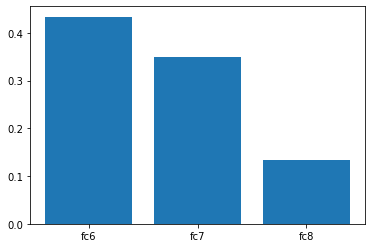

In [294]:
plt.bar(extract_from_layer, corr_d)